In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               77 non-null     object 
 1   Genre              77 non-null     object 
 2   Lead Studio        77 non-null     object 
 3   Audience score %   77 non-null     int64  
 4   Profitability      77 non-null     float64
 5   Rotten Tomatoes %  77 non-null     int64  
 6   Worldwide Gross    77 non-null     object 
 7   Year               77 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 4.9+ KB


In [4]:
ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45701 entries, 0 to 45700
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     45701 non-null  int64  
 1   movieId    45700 non-null  float64
 2   rating     45700 non-null  float64
 3   timestamp  45700 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 1.4 MB


In [5]:
movies.shape


(77, 8)

In [6]:
ratings.shape

(45701, 4)

In [7]:
movies.describe()

,Audience score %,Profitability,Rotten Tomatoes %,Year
count,77.000000,77.000000,77.000000,77.000000
mean,63.727273,4.599483,46.701299,2009.077922
std,13.657113,8.031990,26.095001,1.354974
min,35.000000,0.000000,3.000000,2007.000000
25%,52.000000,1.751351,26.000000,2008.000000
50%,64.000000,2.642353,45.000000,2009.000000
75%,76.000000,5.103117,64.000000,2010.000000
max,89.000000,66.934000,96.000000,2011.000000


In [8]:
ratings.describe()

,userId,movieId,rating,timestamp
count,45701.000000,45700.000000,45700.000000,4.570000e+04
mean,153.800814,18938.691510,3.533042,1.184236e+09
std,90.116511,35437.286736,1.044106,2.152262e+08
min,1.000000,1.000000,0.500000,8.293223e+08
25%,68.000000,1100.000000,3.000000,9.761397e+08
50%,156.000000,2806.000000,3.500000,1.161864e+09
75%,232.000000,7346.000000,4.000000,1.418064e+09
max,303.000000,193587.000000,5.000000,1.537650e+09


In [9]:
genres=[]
for genres in movies.Genre:
    x=genres.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)
movie_title=[]
for title in movies.Film:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)

In [10]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(movie_title)



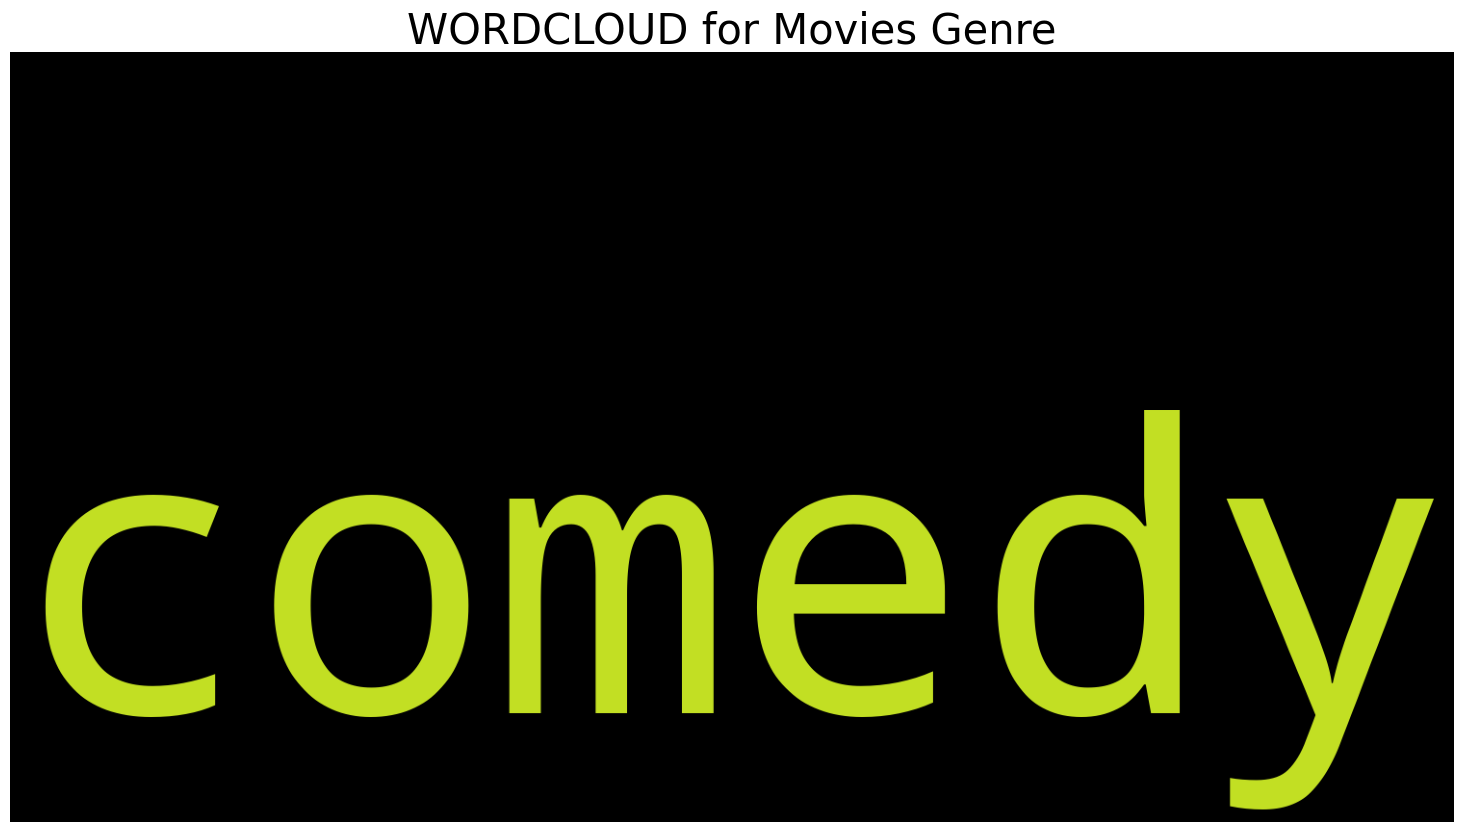

In [11]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)


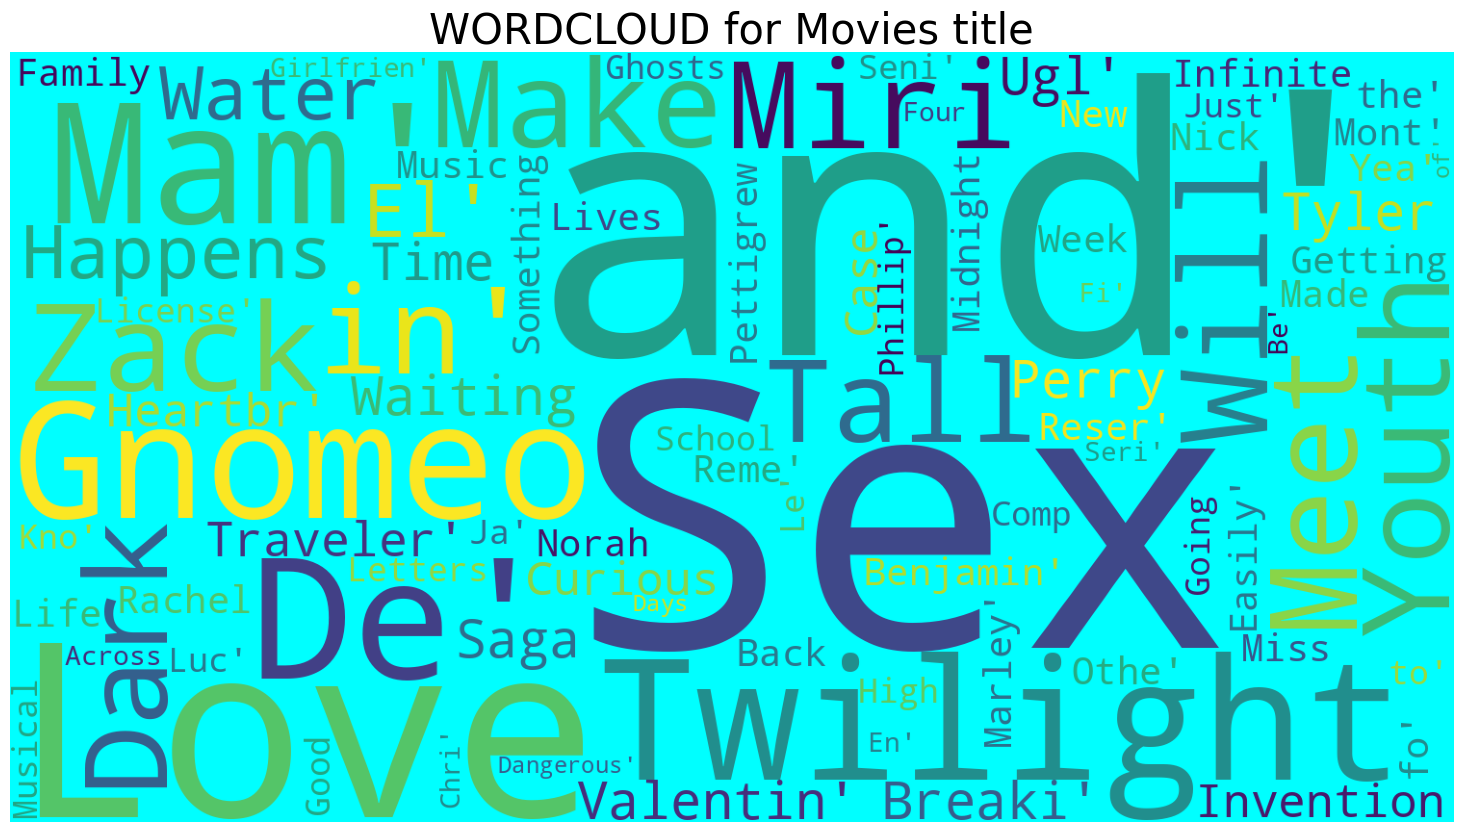

In [12]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=30)
plt.imshow(wordcloud_title)

In [14]:
id=ratings['movieId']
movies=movies.assign(movieId=id)


df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,1,1.0,4.0,964982703.0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70.0,1.747542,64.0,$41.94,2008.0
1,1,3.0,4.0,964981247.0,Youth in Revolt,Comedy,The Weinstein Company,52.0,1.090000,68.0,$19.62,2010.0
2,1,6.0,4.0,964982224.0,You Will Meet a Tall Dark Stranger,Comedy,Independent,35.0,1.211818,43.0,$26.66,2010.0
3,1,47.0,5.0,964983815.0,When in Rome,Comedy,Disney,44.0,0.000000,15.0,$43.04,2010.0
4,1,50.0,5.0,964982931.0,What Happens in Vegas,Comedy,Fox,72.0,6.267647,28.0,$219.37,2008.0


In [15]:
df1=df.groupby(['Film'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head()


,rating
Film,
The Curious Case of Benjamin Button,653.5
The Proposal,644.0
One Day,562.5
The Time Traveler's Wife,533.0
Fireproof,468.5


<BarContainer object of 20 artists>

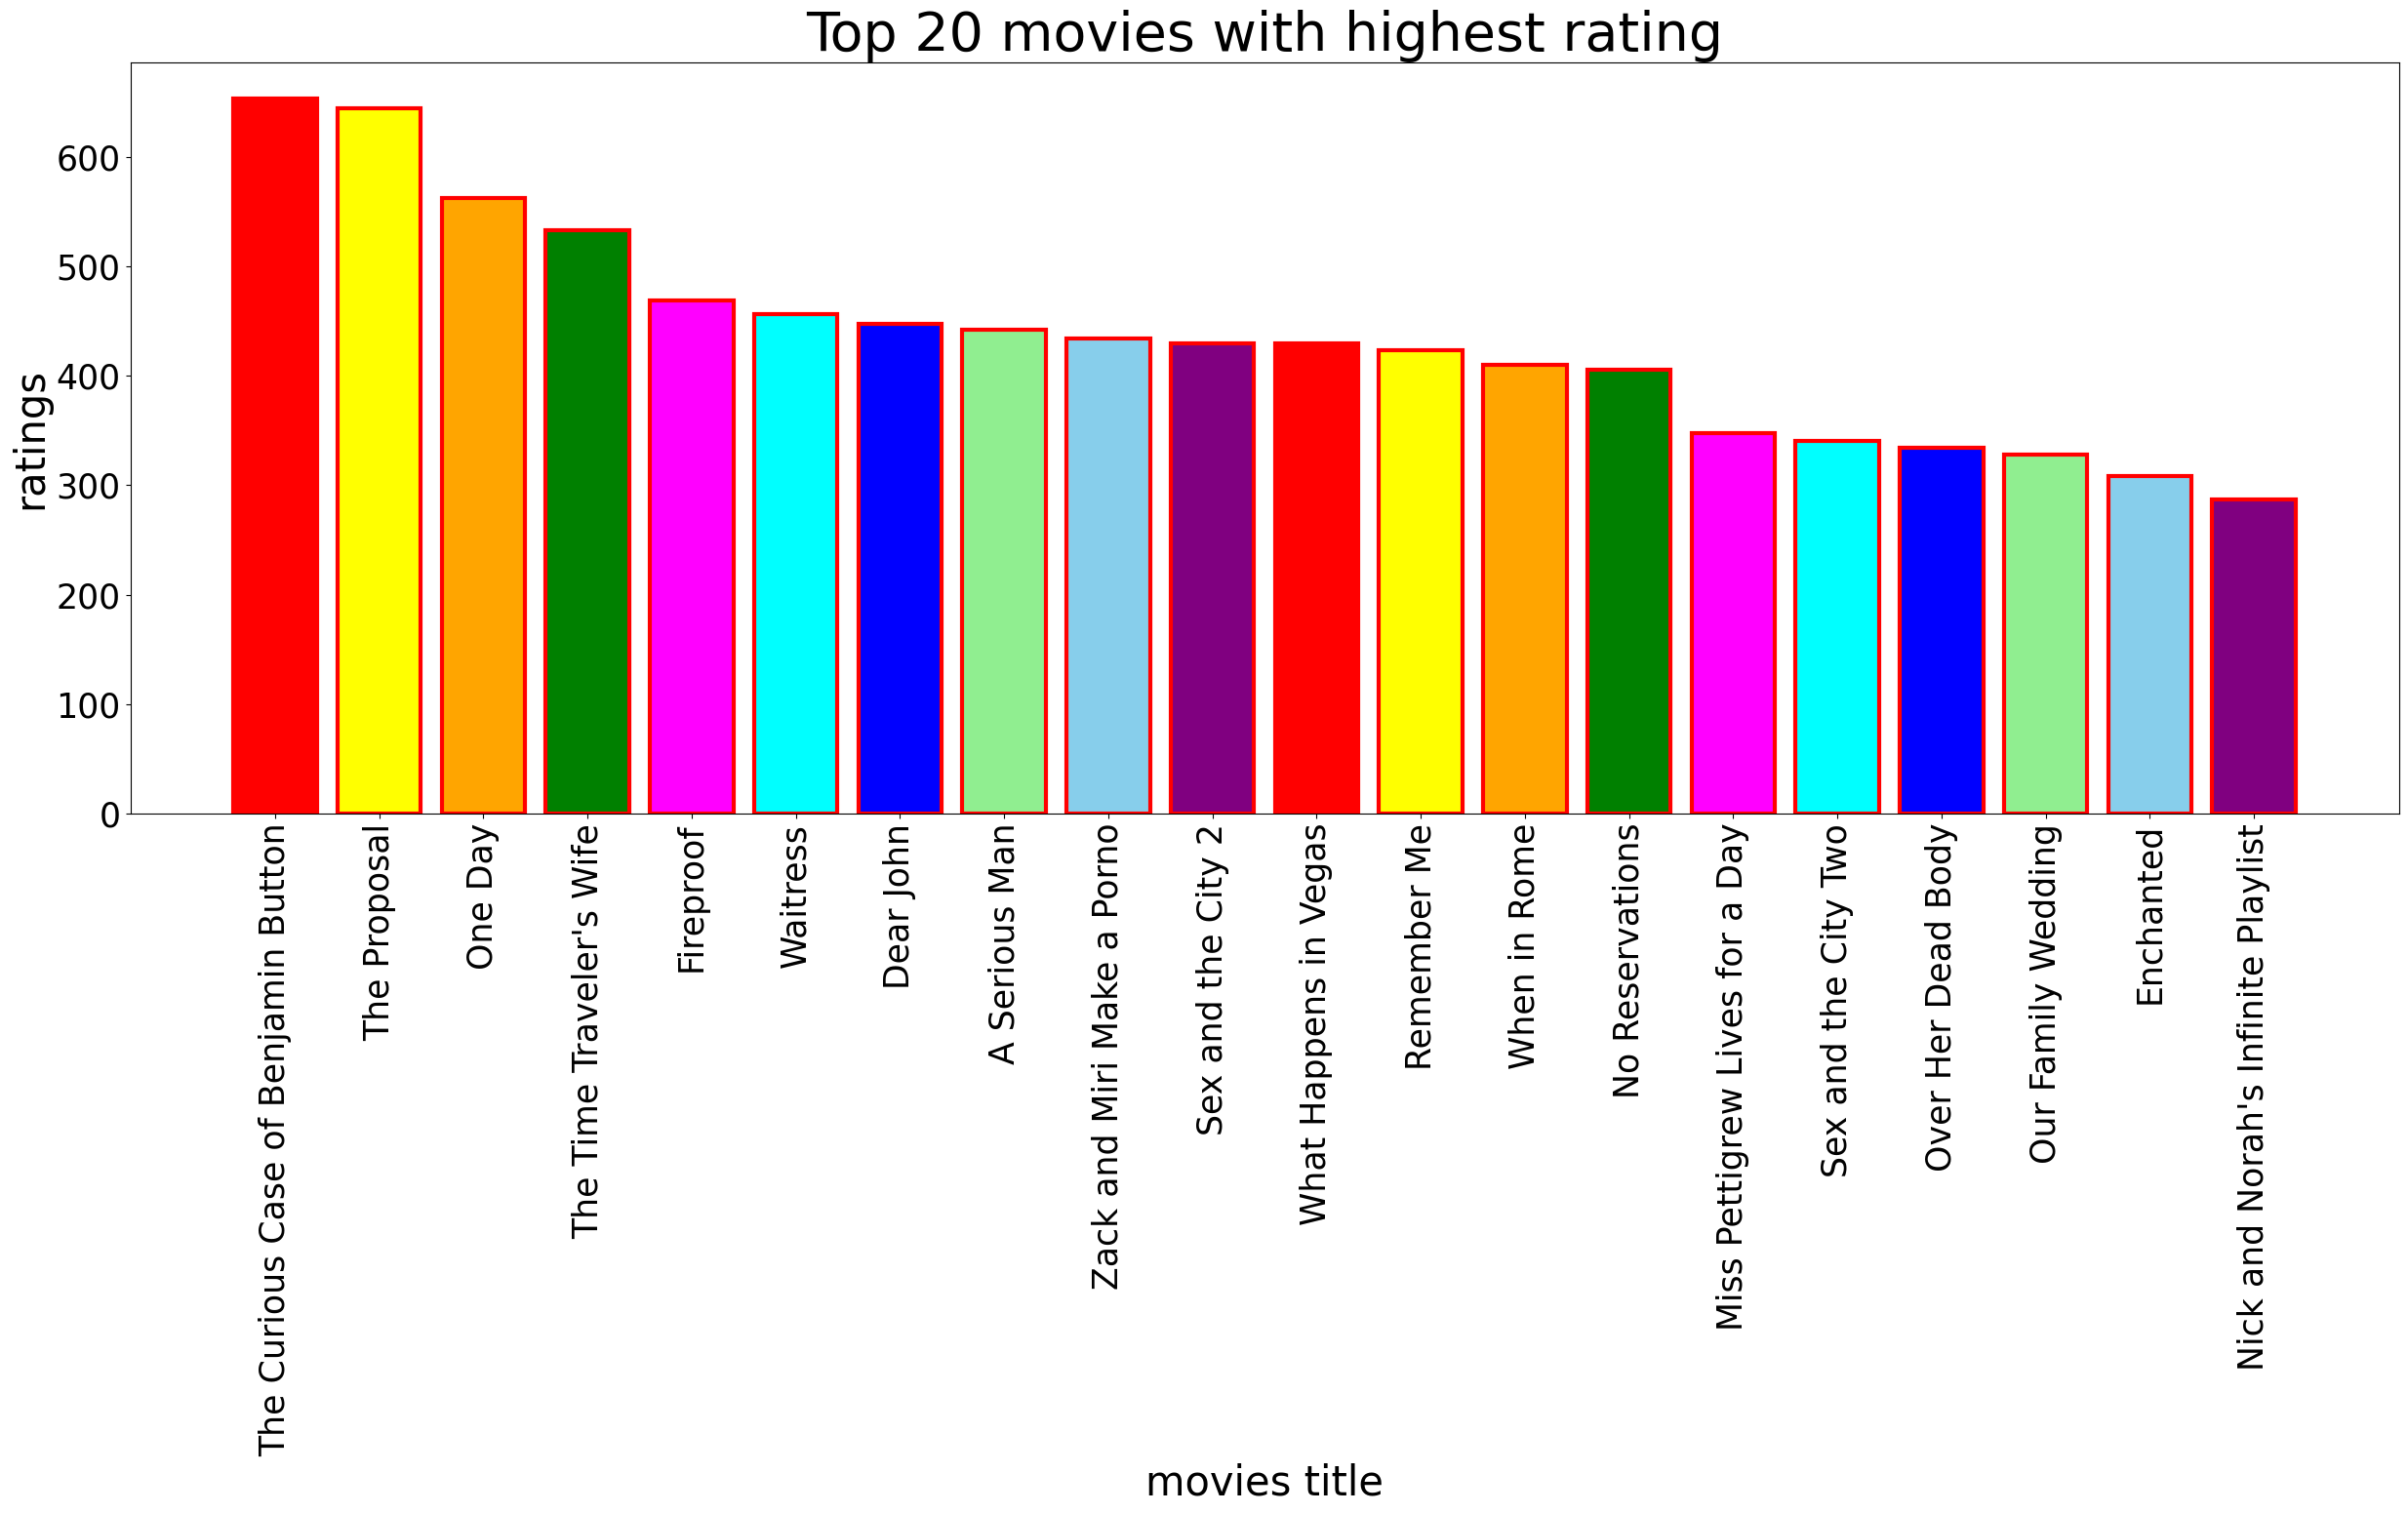

In [16]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='red',color=colors)




In [17]:

df2=df.groupby('Film')[['rating']].count()
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

,rating
Film,
The Curious Case of Benjamin Button,159
The Proposal,159
One Day,136
The Time Traveler's Wife,125
Waitress,115


<BarContainer object of 20 artists>

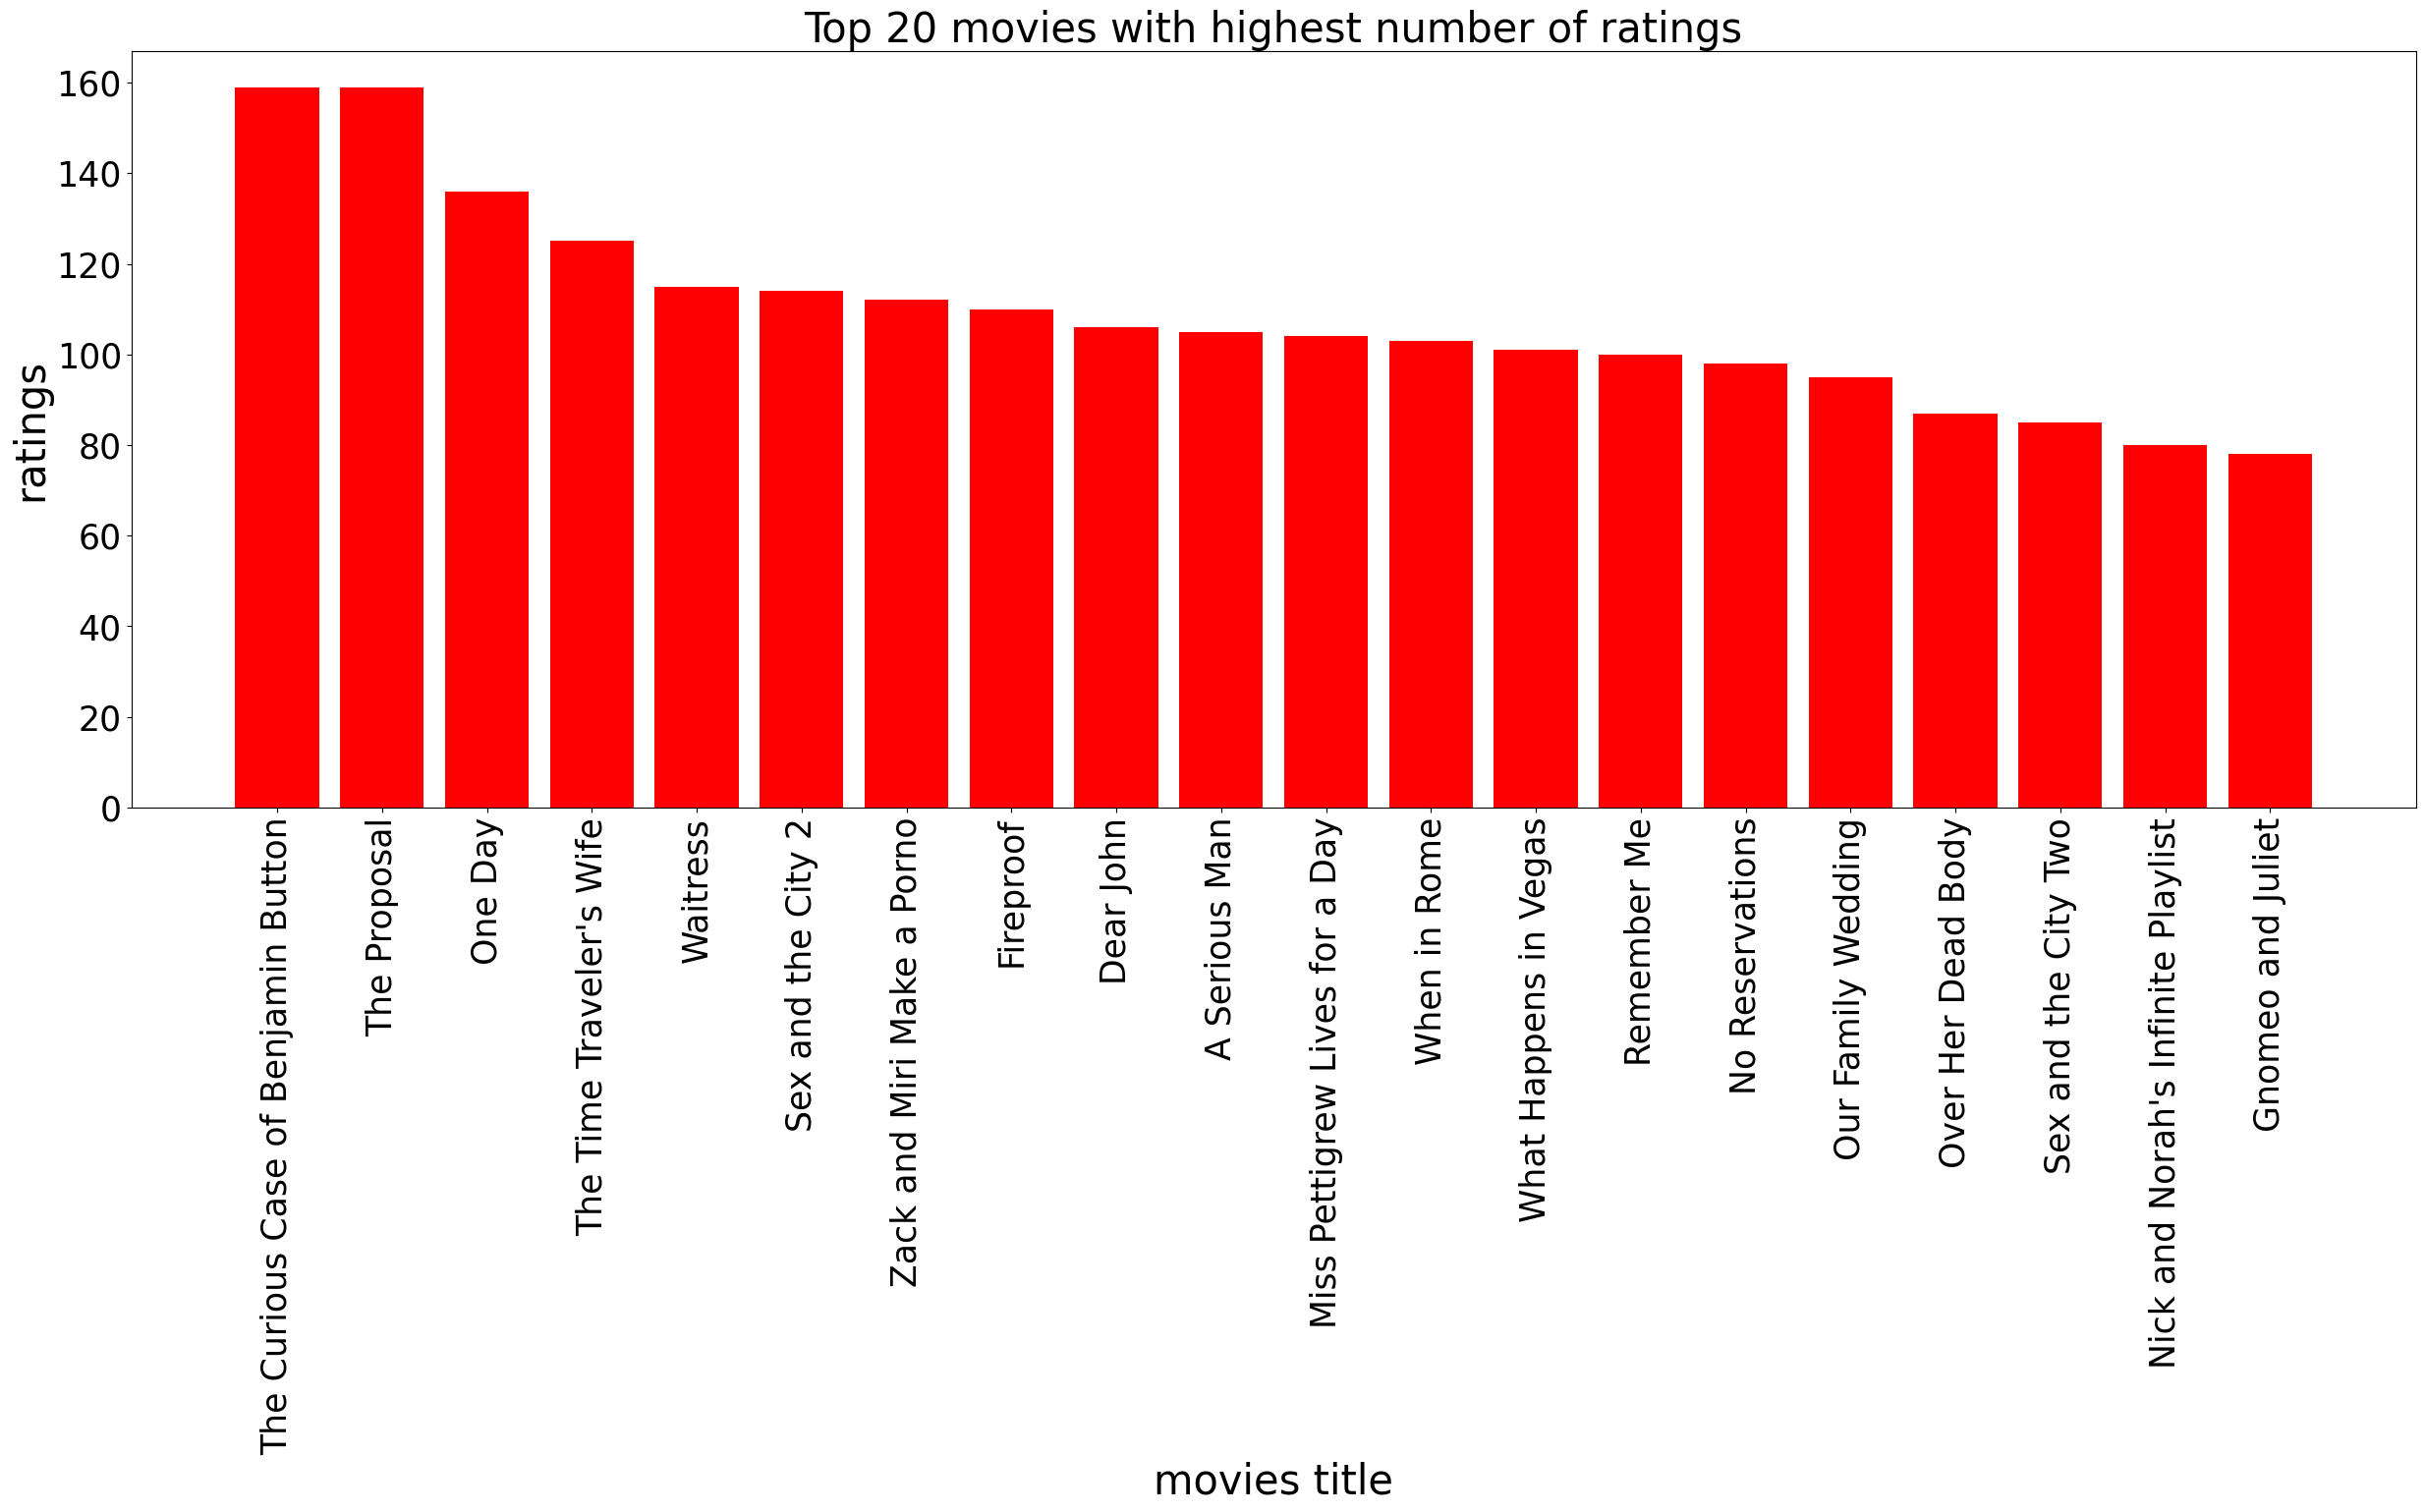

In [19]:

plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('ratings',fontsize=30)

plt.bar(rating_count_20.index,rating_count_20.rating,color='red')

In [18]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['Genre'])



movie_user = df.pivot_table(index='userId',columns='Film',values='rating')
movie_user.head()


Film,(500) Days of Summer,27 Dresses,A Dangerous Method,A Serious Man,Across the Universe,Beginners,Dear John,Enchanted,Fireproof,Four Christmases,...,Valentine's Day,WALL-E,Waiting For Forever,Waitress,Water For Elephants,What Happens in Vegas,When in Rome,You Will Meet a Tall Dark Stranger,Youth in Revolt,Zack and Miri Make a Porno
userId,,,,,,,,,,,,,,,,,,,,,
1,2.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,4.0,NaN,NaN,NaN,3.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,4.0


In [20]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


indices=pd.Series(movies.index,index=movies['Film'])
titles=movies['Film']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]



recommendations('The Proposal')

2     You Will Meet a Tall Dark Stranger
3                           When in Rome
4                  What Happens in Vegas
9                        Valentine's Day
13                        The Ugly Truth
16                          The Proposal
17                The Invention of Lying
18                    The Heartbreak Kid
21                      The Back-up Plan
24                She's Out of My League
25                  Sex and the City Two
26                    Sex and the City 2
27                      Sex and the City
30                              Penelope
32                    Over Her Dead Body
33                    Our Family Wedding
36                       No Reservations
37    Nick and Norah's Infinite Playlist
42        Miss Pettigrew Lives for a Day
44                         Marley and Me
Name: Film, dtype: object